In [1]:
!pip install tensorflow==2.0.0-alpha0 

  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [2]:
data_df = pd.read_csv('data/heart.csv')
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Logistic Regression

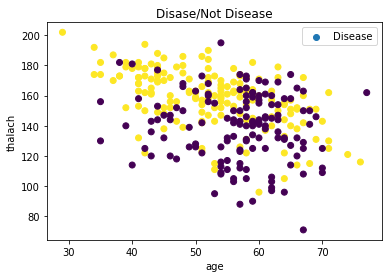

In [4]:
X = np.c_[data_df[["age","thalach"]]]
y = np.c_[data_df["target"]]

(m,n) = X.shape

# display all examples
fig = plt.figure()
plt.title('Disase/Not Disease')
plt.xlabel('age')
plt.ylabel('thalach')
plt.scatter(X[:,0],X[:,1], c=y.ravel())
plt.legend(["Disease", "Not Disease"])

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())

#print model parameters
print("w0 =", clf.intercept_[0], ", w1 = ", clf.coef_[0][0], ", w2 = ", clf.coef_[0][1])

w0 = -2.463220982935126 , w1 =  -0.009675434415814727 , w2 =  0.02062501486312849


In [34]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2 

poly = PolynomialFeatures(degree,                 # Degree 2
                          interaction_only=True,  # Avoid e.g. square(a)
                          include_bias = False    # No constant term
                          )
Xmap = poly.fit_transform(X[:, : 5])

print(X.shape)
print(Xmap.shape)

(303, 2)
(303, 3)


In [35]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(Xmap, y.ravel())
w_star = clf.coef_[0]

In [37]:
def get_boundary(u, v, theta, degree):
    boundary = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            
            poly = PolynomialFeatures(degree)
            uv = [np.array([u[i],v[j]])]
            poly_map = poly.fit_transform([np.array([u[i],v[j]])])
            boundary[i, j] = (poly_map[0].dot(np.array(theta)))

    return boundary



In [40]:
#plot data and boundary
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

bd = get_boundary(u, v, w_star, degree)

plt.title('heart diease')
plt.xlabel('age')
plt.ylabel('thalta')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, bd, 0, colors='red')
plt.legend()
plt.show()

ValueError: shapes (6,) and (3,) not aligned: 6 (dim 0) != 3 (dim 0)

<Figure size 432x288 with 0 Axes>

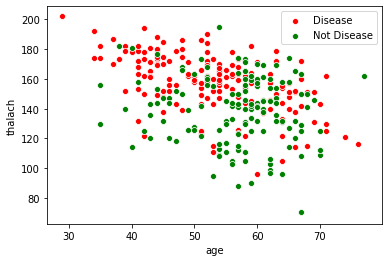

In [8]:
sns.scatterplot(data_df.age[data_df.target==1], y=data_df.thalach[(data_df.target==1)], color='red')
sns.scatterplot(data_df.age[data_df.target==0], y=data_df.thalach[(data_df.target==0)], color='green')
plt.legend(["Disease", "Not Disease"])

NameError: name 'sns' is not defined

In [ ]:
https://raw.githubusercontent.com/elafouisbihi/projet_de_machine_learning/tree/master/data

In [ ]:
https://github.com/elafouisbihi/projet_de_machine_learning/tree/master/data